In [46]:
import numpy as np
import matplotlib.pyplot as plt

## Using Exponential Decay to find 10 pruning amounts that decreases exponentially

In [47]:
def get_exp_curve(total_sum: float) -> list[float]:
    if total_sum == 0:
        return [0.0] * 10
    
    x = np.arange(10)
    decay_target_ratio = 0.01
    
    k_rate = -np.log(decay_target_ratio) / 9
    curve_raw = np.exp(-k_rate * x)
    shift_amount = curve_raw[-1]    
    curve_shifted = curve_raw - shift_amount
    sum_of_shifted = np.sum(curve_shifted)
    scaling_factor = total_sum / sum_of_shifted
    final_curve = curve_shifted * scaling_factor
    final_curve[-1] = 0.0
    return final_curve.tolist()

0.042: 41, 0.025: 24, 0.015: 14, 0.009: 8, 0.005: 5, 0.003: 2, 0.002: 1, 0.001: 0, 0.000: 0, 0.000: 0, 0.10000000000000002

Total filters removed: 100


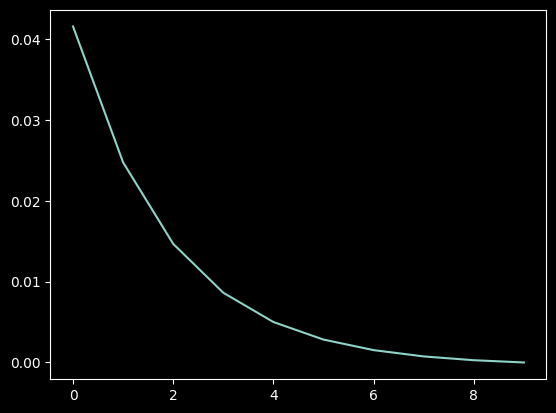

In [48]:
inp = 0.1
num_filters = 1000
filters_rem = 0
for x in get_exp_curve(inp):
    print(f"{x:.3f}: {int(x * num_filters):.0f}", end=", ")
    filters_rem += x * num_filters

plt.plot(get_exp_curve(inp))
print(sum(get_exp_curve(inp)))

print(f"\nTotal filters removed: {filters_rem:.0f}")

### method is

1. prune with x[0]
2. fine tune
3. prune with x[1]
4. fine tune
5. prune with x[2]
6. fine tune <br>
...
19. prune with x[9]
20. fine tune
<br>
this should give better results

### time taken would be approx 10x the time taken by the other pruning algorithm
### should go to the global optima, theoritically